### 18.06SC Homework assignment and recitation problems using python
###### Created by:

###### Name          : <your name>
Time spent    : timestart: 08. May 7 2020,14:15 MOW

### /18.06SC/18-06sc-fall-2011/contents/ax-b-and-the-four-subspaces/

#### 1. The geometry of linear equations

/18.06SC/18-06sc-fall-2011/contents/ax-b-and-the-four-subspaces/the-geometry-of-linear-equations/MIT18_06SCF11_Ses1.1prob.pdf

Problem 1.1
Find combination of $ x_{1}w_{1} + x_{2}w_{2} + x_{3}w_{3} $ that gives zero vector:

In [1]:
import sympy as sym
from sympy import Matrix

W = Matrix()
w1 = Matrix([1,2,3])
w2 = Matrix([4,5,6])
w3 = Matrix([7,8,9])
W = W.row_join(w1)
W = W.row_join(w2)
W = W.row_join(w3)
W

Matrix([
[1, 4, 7],
[2, 5, 8],
[3, 6, 9]])

Elimination:

In [2]:
W.row_op(1,lambda M,j:W[1,j]-2*W[0,j])
W.row_op(2,lambda M,j:W[2,j]-3*W[0,j]-2*W[1,j])
W

Matrix([
[1,  4,  7],
[0, -3, -6],
[0,  0,  0]])

In [3]:
# try: 
xp = Matrix([1,-2,1])
# check:
# solution is [1,-2,1]
# Three vectors lie in a plane; The matrix is not invertible. 
W * xp == sym.zeros(3,1)

True

1.2 Multiply matrix and vector

In [21]:
M = Matrix([[1,2,0],
            [2,0,3],
            [4,1,1]])
v = Matrix([3,-2,1])

# computation:
M.col(0)*v[0] + M.col(1)*v[1] + M.col(2)*v[2]

Matrix([
[-1],
[ 9],
[11]])

1.3 

`True` or `False` : Matrix A size 3 by 2 times matrix B size 2 by 3 is equal AB size 3 by 3: `True`

In [30]:
A = Matrix.zeros(3,2)
B = Matrix.zeros(2,3)
A*B

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

#### Recitation 1

Solve system:

$ 2x + y = 3 $ \n

$ x - 2y =-1 $

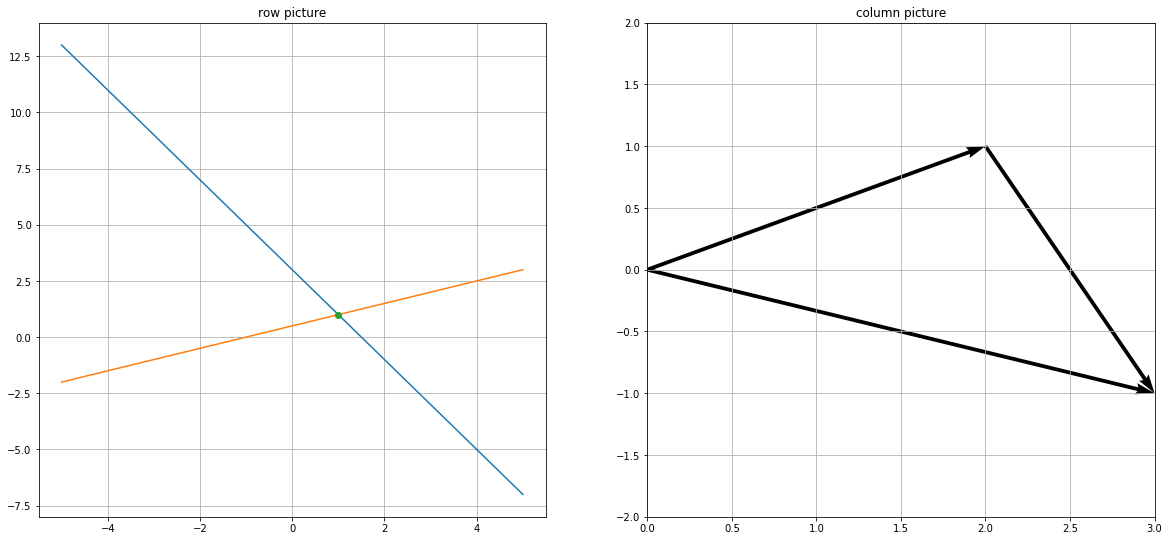

In [15]:
import numpy as np
import matplotlib.pyplot as plt
sz=20
fig = plt.figure(figsize=(sz,sz))

ax1 = fig.add_subplot(221)
ax1.grid()

x = np.linspace(-5,5,10)
y1 = -2*x+3
y2 = (x + 1)/2

ax1.title.set_text("row picture")
ax1.plot(x,y1)
ax1.plot(x,y2)
ax1.plot(1,1,'o')

ax2 = fig.add_subplot(222)
x=1
y=1
vectors = np.array([[0, 0, 2, 1], 
                    [0, 0, 1, -2], 
                    [0, 0, 3, -1]])
vec_plt = np.array([x*vectors[0], 
                   [x*vectors[0,2], x*vectors[0,3], y*vectors[1,2] ,y*vectors[1,3]], 
                   [0, 0, 3, -1]])

X, Y, U, V = zip(*vec_plt)

ax2.title.set_text("column picture")
ax2.grid()
ax2 = plt.gca()
ax2.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
ax2.set_xlim([0, 3])
ax2.set_ylim([-2, 2])
plt.draw()
plt.show()

##### Overview of key Ideas

System Ax+b

b = $[1,4,1,1]^T$ <br>
x = $[0,1,1]^T + c[0,2,1]^T$ <br>
What can be found about the colums of A? <br>
1. $A*xs = 0$ therefore: <br>
$2a_2 + a_3 = 0$ <br>
$a_3 =-2a_2$ <br> 
2. $A*xp = b$ <br>
$a_2+a_3 = b$ substitute  $a_3=-2a_2$ <br>
$-a_2 = b$ <br>
$a_3 = 2b$

In [39]:
from sympy import Matrix
from sympy.abc import c
b = Matrix([1,4,1,1])
xp = Matrix([0,1,1])
xs = Matrix([0,2,1])
A = Matrix.zeros(4,3)
A.col_op(1, lambda M,i: -1*b[i])
A.col_op(2, lambda M,i: 2*b[i])
print("Check Axp=b:", A*xp==b)
print("Check Axs=0:", A*xs==Matrix.zeros(4,1))

Check Axp=b: True
Check Axs=0: True


#### 2. Elimination with matrices

/18.06SC/18-06sc-fall-2011/contents/ax-b-and-the-four-subspaces/elimination-with-matrices/MIT18_06SCF11_Ses1.2prob.pdf

Problem 1.1 

In the following system find multiple of the first equation to be substracted from second equation.  <br>
Solve the system using elimination. <br>
System: <br>
$2x + 3y = 5$ <br>
$6x + 15y = 12 $ <br>

2.2 

Find triangular matrix E that reduces "Pascal's matrix" to a smaller Pascal.
Find matrix E, that reduces it all the way to I

In [19]:
from sympy import Matrix
A = Matrix.eye(4,4)
for i in range(1,4):
    for j in range(i):
        A[i,j]+=i
A.col_op(0,lambda M,x: 1)
E = Matrix.eye(4,4)
E1=E.copy()
E2=E.copy()
E[3,2]=-1
E[2,1]=-1
E[1,0]=-1
E1[2,1]=-1
E1[3,1]=-1
E2[3,2]=-2
M = E2*E1*E

Matrix([
[ 1,  0,  0, 0],
[-1,  1,  0, 0],
[ 1, -2,  1, 0],
[-1,  3, -3, 1]])

#### Recitation 2

Solve, using elimination:

$ x-y-z+w= 0$ <br>
$2x + 2z = 8$ <br>
$-y - 2z = -8$ <br>
$3x-3y-2z+4u=7$


In [55]:
from sympy import Matrix
A = Matrix([[1,-1,-1,1],
            [2, 0, 2,0],
            [0,-1,-2,0],
            [3,-3,-2,4]])
b = Matrix([0,8,-8,7])

Aug = A.row_join(b)
E = Matrix.eye(4,4)
E[1,0]=-2
E[3,0]=-3
E[1,2]=2

Aug = E*Aug
E = Matrix.eye(4,4)
Aug.row_swap(1,2)
Aug.row_swap(2,3)
E[1,1]=-1
E[3,3]=-1
E*Aug
# w = 4, then z = 7-4, 3, then y = 8 - 2*3 = 2, then x = 2+3-4 = 1
x = Matrix([1,2,3,4])
print("Check Ax=b", A*x==b)

Check Ax=b True


#### 3. Multiplication and inverse matrices.  

##### 3.1 Add $AB + AC$ and compare with $A(B+C)$


In [4]:
import sympy as sym
from sympy import Matrix
A = Matrix([[1,2],
            [3,4]])
B = Matrix.zeros(2,2)
B[0,0]=1
C = Matrix([[0,0],
            [5,6]])
(A*B + A*C) == A*(B+C)

True

The end result is a matrix<br>
1. AB: first column of AB is one times [1,3] plus zero times [2,3], second column is [0,0] -> AB = [1,0],[3,0] <br>
   AC: First column of AC is zero times [1,3] plus five times [2,4], second column is zero times [1,3] plus six times [2,4], AC = [10,12],[20,24] <br>
   Sum is [11,12].T,[23,24].T <br>
   
2. B+C is [1,0],[5,6], A times B+C: <br>
   first column is one times [1,3] add five times [2,4], i.e. [11,23] <br>
   second column is zero times [1,3] add six times [2,4] i.e. [12,24] <br>

##### 3.2
Use Gauss Jordan Elimination on $[U  I]$ to find upper triangular $U^-1$

In [32]:
import sympy as sym
from sympy import Matrix
from sympy.abc import a,b,c
U = Matrix.eye(3,3)
U[0,1] = a
U[0,2] = b
U[1,2] = c
Uaug = U.row_join(Matrix.eye(3,3))
E1 = Matrix.eye(3,3)
E1[1,2]= -c
E1[0,2]= -b
E2 = Matrix.eye(3,3)
E2[0,1]= -a
E2[0,2]= a*c
E=E1*E2
E

Matrix([
[1, -a, a*c - b],
[0,  1,      -c],
[0,  0,       1]])

#### Recitation 3


In [50]:
from sympy import Matrix
from sympy.abc import a,b

A = Matrix([[a,b,b],
            [a,a,b],
            [a,a,a]])
E = Matrix.eye(3)
Aug = A.row_join(Matrix.eye(3))
E1 = E.copy()
E2 = E.copy()
E3 = E.copy()
E1[2,1] = -1
E1[1,0] = -1
E1[0,0] = 1/a 
E2[1,1] = 1/(a-b)
E2[2,2] = 1/(a-b)
E = E2*E1
result = E*Aug
result[1,1] = 1
result[2,2] = 1
E3[0,1] = -b/a
E3[0,2] = -b/a

E3*result # b/a(a-b) + 1/a simplified into 1/(a-b)

Matrix([
[1, 0, 0, b/(a*(a - b)) + 1/a,          0, -b/(a*(a - b))],
[0, 1, 0,          -1/(a - b),  1/(a - b),              0],
[0, 0, 1,                   0, -1/(a - b),      1/(a - b)]])

#### 4. Factorization into A = LU

##### 4.1
Find $E$ and $E^{-1} = L$ for the matrix below

In [10]:
from sympy import Matrix
A = Matrix([[1,3,0],
            [2,4,0],
            [2,0,1]])
E = Matrix.eye(3)
E1 = E.copy()
E2 = E.copy()
L = Matrix.eye(3)
E1[1,0] = -2
E1[2,0] = -2
E2[2,1] = -3
L[1,0] = 2
L[2,0] = 2
L[2,1] = 3
E=E2*E1
L*E*A == A

True

##### 4.2 
Compute $U ,L$ <br>
Find conditions on a,b,c,d.

In [35]:
from sympy import Matrix
from sympy.abc import a,b,c,d
A = Matrix([[a,a,a,a],
            [a,b,b,b],
            [a,b,c,c],
            [a,b,c,d]])
E = Matrix.eye(4)
L = E.copy()
E1 = E.copy()
E1[3,0]=-1
E1[2,0]=-1
E1[1,0]=-1
E2 = E.copy()
E2[3,1]=-1
E2[2,1]=-1
E3 = E.copy()
E3[3,2] = -1

L[3,0]=1
L[2,0]=1
L[1,0]=1
L[3,1]=1
L[2,1]=1
L[3,2]=1
 
E = E3*E2*E1
U = E*A
print("Check by-hand solution:" ,L*U==A)
print('Constrains: a!=0,b!=a,c!=b,d!=c')
# Using symbolic solver
A = Matrix([[a,a,a,a],
            [a,b,b,b],
            [a,b,c,c],
            [a,b,c,d]])
L,U,[] = A.LUdecomposition()

Check by-hand solution: True
Constrains: a!=0,b!=a,c!=b,d!=c


#### Recitation 4 

Find the LU-decomposition of matrix, for which a and b it exists?

In [49]:
from sympy.abc import a,b
from sympy import Matrix
A = Matrix([[1,0,1],
            [a,a,a],
            [b,b,a]])
E = Matrix.eye(3)
L = E.copy()
E1 = E.copy()
E2 = E.copy()
E3 = E.copy()
E = E3*E2*E1
U = E*A
# for decomposition to exist a must not be 0, 
# A.LUdecomposition()
U

Matrix([
[1, 0, 1],
[a, a, a],
[b, b, a]])

#### 5. Transposes, Permutations, Vector Spaces

##### 5.1 <br>
a) Find a 3x3 permutation matrix P such as $P^{3} = I$ and $P \neq I$  <br>
b) Find a 4x4 matrix $\hat{P}$ with $\hat{P}^{4} \neq I$ 

In [46]:
from sympy import Matrix
'a'
P = Matrix.eye(3)
P.row_swap(0,1)
P.row_swap(1,2)
P*P*P == Matrix.eye(3)
P

Matrix([
[0, 1, 0],
[0, 0, 1],
[1, 0, 0]])

In [62]:
'b'
P_hat = Matrix.eye(4)
P_hat.row_swap(1,2) 
P_hat.row_swap(2,3) 
P_hat**3 == Matrix.eye(4)
P_hat**4 == Matrix.eye(4)

False

##### 5.2
Suppose A is 4x4. How many entries can be chosen independently if <br>
a) A is symmetric? <br>
b) A is skew-symmetric ($A^{T} = -A$)

In [82]:
from sympy.abc import a,b,c,d,e,f,g,h,i,j
# import sympy
A = Matrix([[a,b,c,d],
            [b,e,f,g],
            [c,f,h,i],
            [d,g,i,j]])
A.is_symmetric() 
list(map(chr,range(97,107))) 
print('For symmetric:', 10)
B = Matrix([[ 0, b, c,d],
            [-b, 0, f,g],
            [-c,-f, 0,i],
            [-d,-g,-i,0]])
B.transpose()==-1*B 
print('For skew-symmetric:', 6)

For symmetric: 10
For skew-symmetric: 6


##### 5.3
T or F, give counterexample:<br>
a)The symmetric matrices in M (with $A^{T}=A$) form a subspace.  **True** <br>
_In this case transpose of a sum is sum of transposes, which is same as sum of matrices themselves. By adding up  symmetric matrices we'll always get a symmetric matrix; Multiplying a symmetric matrix by constant does not break symmetry_<br>
b)The skew-symmetric matrices in M (with $A^{T}=-A$) form a subspace. **True**<br>
_By adding skew-symmetric matrices we'll always get skew symmetric, and mult works _
c)The unsymmetric matrices in M (with $A^{T} \neq A$)form a subspace. **False**<br>

c) Sum of two unsymmetric matrices can give a symmetric matrix. Therefore unsymmetric matrices are not a subspace.

#### 6. Column Space, Null space

##### 6.1 
Suppose _S_ and _T_ are subspaces of _V_ <br>

a) s is in _S_, t in _T_, S+T contains all s+t. Show that S+T satisifies requirements for a vector space. <br>
b) If _S_ and _T_ are lines in $R^{m}$ waht us difference between S+T and S u T? The union contains vectors from S, T or both? Explain: the span of S u T is S+T 

##### 6.2 
The plane $x-3y-z=12$ is parallel to $x-3x-x = 0$, one point in it is (12,0,0). <br>
Fill the components: <br>
$\begin{pmatrix}x\\y\\z\end{pmatrix} = \begin{pmatrix} \\0\\0\end{pmatrix} +y\begin{pmatrix} \\1\\0\end{pmatrix}+z\begin{pmatrix} \\0\\1\end{pmatrix}  $ <br>

$x-3y-z=12$ is equal to $x=12+3y+z$, so the solution: <br>
$\begin{pmatrix}x\\y\\z\end{pmatrix} = \begin{pmatrix}12\\0\\0\end{pmatrix} +y\begin{pmatrix}3\\1\\0\end{pmatrix}+z\begin{pmatrix}1\\0\\1\end{pmatrix}  $

##### 6.3
How is the nullspace $N(C)$ related to the spaces $N(A)$ and $N(B)$, if $C=\begin{pmatrix}A\\B\end{pmatrix} $ <br>

Nullspace of C will contain all the vectors that are in both nullspaces is Cx=0,Ax=0 and Bx=0

#### 7. Solving Ax=0: Pivot Variables, Special solutions

##### 7.1 
Find row reduced form, rank and solutions to $Ax=0$

In [17]:
from sympy import Matrix
A = Matrix([[1,5,7,9],
            [0,4,1,7],
            [2,-2,11,-3]])
Ar,pivots = A.rref()# row reduced form
print("Rank:",2)
solution,a = A.gauss_jordan_solve(Matrix([0,0,0]))
solution
# Parametric solution intepretation:
# [-23/4,1/4,1,0] and c[-1/4,-7/4,0,1]

Rank: 2


Matrix([
[-23*tau0/4 - tau1/4],
[ -tau0/4 - 7*tau1/4],
[               tau0],
[               tau1]])

##### 7.2 
Find $A_1$ and $A_2$ so that $rk(A_1 B) = 1$ and $rk(A_2 B) = 0$

In [20]:
B = Matrix([[1,1],[1,1]])
A1 = Matrix.eye(2)
A2 = Matrix.zeros(2)
print('Check rk(A1*B):',Matrix.rank(A1*B) == 1)
print('Check rk(A2*B):',Matrix.rank(A2*B) == 0)

Check rk(A1*B): True
Check rk(A2*B): True


#### 8. Solving Ax=B: Row Reduced form

##### 8.1
Explain why are these false:<br>
a) The complete solution is any linear combination of $x_p$ and $x_n$ <br>
_The complete solution is linear combination of $x_p$ and any vector in $x_n$, which is not the same as any combination of these; An example would be $2x_p + x_{sp}$, because $A*(2x_p)=2Ax_p=2b \neq b$_<br>
b) The system $Ax=b$ has at most one particular solution <br>
_If A is a non-invertible matrix particularly if rk(A)=m<n, $Ax=b$ has infinitely many solutions_ <br>
c) If A is invertible, there is no solution $x_n$ in the nullspace <br>
_Any matrix multiplied by zero will produce zero vector, therefore nullspace will always contain zero vector_

##### 8.2
For matrices U, c find row reduced form, solve Rx=0, Rx = d, check values for Ux=0 and Ux=c

##### 8.3
Suppose Ax=b and Cx=b have same solutionf for every b. A=C? <br>

If $Ax = b, Cx = b$; then $Ax = Cx$. Multiply by $x^{-1}$:<br>
$Axx^{-1}=Cxx^{-1}$ -> $A=C$

#### 9. Independence, Basis, Dimension

##### 9.1
Find the largest possible number of independent vectors among $v1:v6$ in $R^4$ <br>
_Given the vectors and their dimension the number is 4_<br>
_However in this configuration only 3 are linearly independent, so for this srt ndim=3_<br>
##### 9.2 
Find a basis for the plane $x-2y+3z=0$ in $R^3$<br>
Find basis for intersection of that plane with $xy$ plane <br>
Find basis for all vectors perpedicular to the plane.

In [13]:
from sympy import Matrix
import sympy
A = Matrix([[1,-2,3],
            [0,0,0],
            [0,0,0]])
# y and z are free variables, so special solutions are
x1,x2 = [2,1,0], [-3,0,1]
v1 = Matrix(x1)
v2 = Matrix(x2)
# The intersection with xy plane will not contain x2
# The intersection is a line so x1 is a basis
# for perpendicular basis need to calculate cross product:
from sympy.abc import i,j,k
M = Matrix([[i,j,k],x1,x2])
M.det()
v3 = Matrix([1,-2,3])
v3 # basis for 1D space of vectors, perpendicular to this plane. 

Matrix([
[ 1],
[-2],
[ 3]])

#### 10. Four fundamental subspaces

##### 10.1
Suppose A is m by n matrix of rank r, suppose there a right sides b, for which there is no solution.<br>
a) What are inequalities between r,m,n?<br>
_For b to be a solution to $Ax=b$, it has to be in C(A), and C(A) is in $R^m$, therefore if b is not in C(A), then r<m, n<=m_ <br>
b) How do ou know that $A^T=0$ has other solutions then zero? <br>
_$N(A^T)$ is in $R^m$, dim (m-r); if r<m, it means there are non-zero vectors in it_                                      
##### 10.2
$A^T=d$ is solvable when d is in which subspaces? <br>
_d must be in row space of A _
The solution is unique when what space contains only zero vector?<br>
The solution is unique when matrix is full rank, matrix is full rank when nullspace contains only zero vector. Nullspace for $A^T$ is __left nullspace___

#### 11. Matrix Spaces, Rank 1, Small world graphs.

##### 11.1 
Write 3x3 identity matrix as a combination of other five permutation matrices. Then show that these matrices are linearly independent<br>
These matrices are subspace of matrices, where sums of rows and columns are equal<br>

In [48]:
from sympy import Matrix,symbols
I = Matrix.eye(3)
P={}
P[1] = I.copy()
P[1].row_swap(0,1)
P[2] = I.copy()
P[2].row_swap(0,2)
P[3] = I.copy()
P[3].row_swap(2,1)
P[4] = I.copy()
P[4].row_swap(2,1)
P[4].row_swap(0,1)
P[5] = I.copy()
P[5].row_swap(0,1)
P[5].row_swap(2,1)


print('Check P1+P2+P3-P4-P5 = I:',P[1]+P[2]+P[3]-P[4]-P[5] == I)

"Linear independence"
# matrices will be linearly dependent, if their linear combination can be zero. Solve c1P1+..+c5P5=0:
c = symbols('c1:6')
Total=Matrix.zeros(3)
for i,e in enumerate(c):
    Total+=e*P[i+1]

Total.solve(Matrix.zeros(3))
# N(Total) contains only zero-matrix -> sum of matrices is full rank -> matrices are lineraly independent.

Check P1+P2+P3-P4-P5 = I: True


Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

##### 11.2
M is space of 3x3 matrices. Multiply each matrix X in M by A <br>
a) For which X AX=0? <br>
b) Which matrices have the form AX for some X?<br>
c) What are dimensions of of N(M) and C(M), Why they add to (n-r)+r=9?

In [63]:
A = Matrix([[1,0,-1],
            [-1,1,0],
            [0,-1,1]])
"a"
# Find N(A):
A.rref() # rk(A) = 2, 
X,f = A.gauss_jordan_solve(Matrix.zeros(3))
print('Test AX=0',A*X==Matrix.zeros(3))
'b'
# Matrix AX will be linear combination of columns of A. For matrix to have form AX, the columns must sum up to zero. 
'c'
# f (free variable) is dim(3); form AX has 3 columns, but only 2 independent rows - dim 6; and they sum up to number of entires in a matrix 3x3

Test AX=0 True


#### 12. Graphs, Networks, Incidence Matrices

#### 13. Exam Review

#### Exam